In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import data set
path=r'/Users/dariaperestiuk/Documents/02_02_24 Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9.final_part_1.pkl'))

In [ ]:
df_2=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [ ]:
df_2.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [ ]:
df_merged_large = df.merge(df_2, on = 'department_id')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   product_id                  int32  
 1   product_name                object 
 2   department_id               int8   
 3   prices                      float64
 4   order_id                    int32  
 5   user_id                     object 
 6   order_number                int8   
 7   order_day_of_week           int8   
 8   order_hour_of_day           int64  
 9   days_since_prior_order      float64
 10  add_to_cart_order           int64  
 11  reordered                   int64  
 12  price_range_loc             object 
 13  busiest_days                object 
 14  busiest_period_of_day       object 
 15  max_order                   int8   
 16  loyalty_flag                object 
 17  mean_product_price          float64
 18  spending_flag               object 
 19  median_days_between

In [21]:
df.shape

(32434212, 30)

In [6]:
df=df.drop(columns = ['busiest_day','aisle_id', '_merge', 'First Name', 'Last Name', 'eval_set'])

In [25]:
df['busiest_period_of_day'].head()

0    Most orders
1    Most orders
2    Most orders
3    Most orders
4    Most orders
Name: busiest_period_of_day, dtype: object

In [26]:
df['loyalty_flag'].value_counts(dropna = False)

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

In [27]:
df['spending_flag'].value_counts(dropna = False)

Low spender     31798751
High spender      635461
Name: spending_flag, dtype: int64

In [28]:
df['order_frequency'].value_counts(dropna = False)

Frequent customer        21577409
Regular customer          7217134
Non-frequent customer     3639669
Name: order_frequency, dtype: int64

In [29]:
df['price_range_loc'].value_counts(dropna = False)

Mid-range product     21890146
Low-range product     10126384
High-range product      417682
Name: price_range_loc, dtype: int64

In [30]:
df['busiest_days'].value_counts(dropna = False)

Regularly busy    12927461
Busiest days      11875462
Slowest days       7631289
Name: busiest_days, dtype: int64

In [31]:
df['busiest_period_of_day'].value_counts(dropna = False)

Most orders       23226714
Average orders     8319912
Fewest orders       887586
Name: busiest_period_of_day, dtype: int64

In [33]:
df['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [16]:
df['Shopping_Behavior'].value_counts(dropna = False)

early bird    17293547
regular       15136891
night owl         3774
Name: Shopping_Behavior, dtype: int64

In [20]:
df['Lifestyle'].value_counts(dropna = False)

married, middle-income    17002563
single, high-income        5711067
married, low-income        4141296
single, middle-income      3869474
married, high-income       1633054
single, low-income           76758
Name: Lifestyle, dtype: int64

In [32]:
# Create a new column "region" using loc function with mapping
df['region'] = 'West'

df.loc[df['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

df.loc[df['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

df.loc[df['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [14]:
# Define a function for price labels

def Shopping_Behavior_label (row):

  if row['order_hour_of_day'] > 5 and (row['prices'] <= 8):
    return 'early bird'
  elif (row['order_hour_of_day'] <= 5) and (row['prices'] >= 21):
    return 'night owl'
  else: return 'regular'

In [15]:
# Apply price range function
df['Shopping_Behavior'] = df.apply(Shopping_Behavior_label, axis=1)

In [18]:
# Define a function for price labels

def Lifestyle_label(row):

  if row['Marital_Status'] == 'married' and (row['income'] <= 60000):
    return 'married, low-income'

  elif (row['Marital_Status'] == 'married') and (row['income'] > 60000) and (row['income'] <= 160000):
    return 'married, middle-income'

  elif (row['Marital_Status'] == 'married') and (row['income'] > 160000):
    return 'married, high-income'

  elif (row['Marital_Status'] == 'single' or 'divorced/widowed' or 'living with parents and siblings') and (row['income'] <= 30000):
    return 'single, low-income'

  elif (row['Marital_Status'] == 'single' or 'divorced/widowed' or 'living with parents and siblings') and (row['income'] > 30000) and (row['income'] <= 80000):
    return 'single, middle-income'

  elif (row['Marital_Status'] == 'single' or 'divorced/widowed' or 'living with parents and siblings') and (row['income'] > 80000):
    return 'single, high-income'

 
  else: return 'regular'

In [19]:
# Apply price range function
df['Lifestyle'] = df.apply(Lifestyle_label, axis=1)

In [8]:
# Change data type downcast to integer
df['department_id'] = pd.to_numeric(df['department_id'], downcast = 'integer')

In [9]:
df['order_id'] = pd.to_numeric(df['order_id'], downcast = 'integer')

In [10]:
df['product_id'] = pd.to_numeric(df['product_id'], downcast = 'integer')
df['order_number'] = pd.to_numeric(df['order_number'], downcast = 'integer')
df['order_dow'] = pd.to_numeric(df['order_dow'], downcast = 'integer')
df['max_order'] = pd.to_numeric(df['max_order'], downcast = 'integer')
df['Age'] = pd.to_numeric(df['Age'], downcast = 'integer')
df['Dependants'] = pd.to_numeric(df['Dependants'], downcast = 'integer')
df['income'] = pd.to_numeric(df['income'], downcast = 'integer')

In [11]:
df.rename(columns = {'order_dow' : 'order_day_of_week'}, inplace = True)

Text(0.5, 1.0, 'Return Customers by Loyalty')

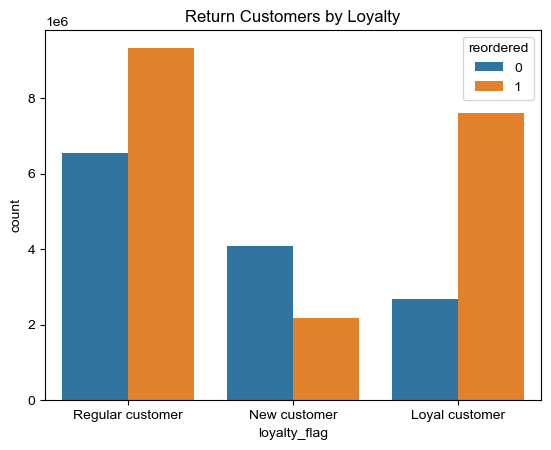

In [5]:
bar_1 = sns.countplot(x='loyalty_flag',hue='reordered',data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Return Customers by Loyalty")

In [9]:
# Exporting chart
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Return Customers by Loyalty.png'))

### Sampling Data


In [23]:
# Set the seed for the random number generator
np.random.seed(4)

In [24]:
# Create Sample in a 70/30 split
dev = np.random.rand(len(df)) <= 0.7

In [25]:
# View Output
dev

array([False,  True, False, ..., False,  True,  True])

In [26]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [27]:
#Store 30% of the sample in the dataframe small
small = df[~dev]

In [28]:
# Export as pickle file
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Small_sampling.pkl'))

### Export Data

In [29]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_full.pkl'))